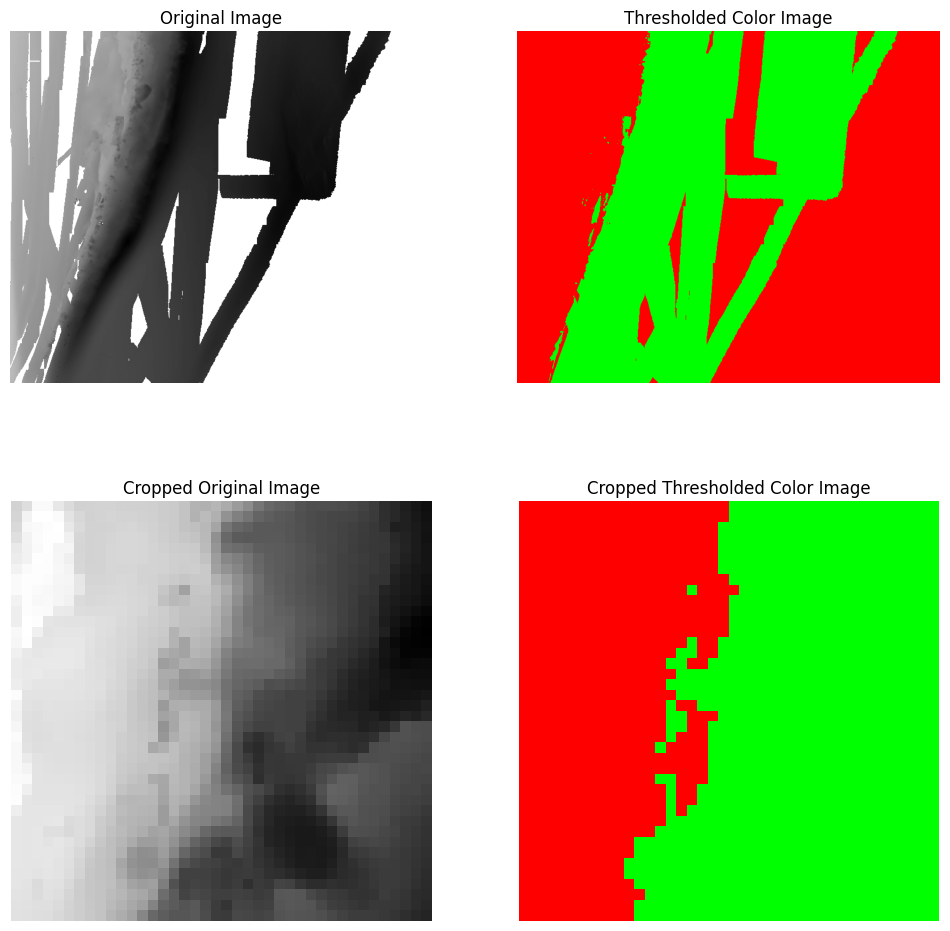

In [109]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


# Open the TIFF file
image = Image.open("seabed_florida_V2.tiff")

# # Display the image
# image.show()

# If you want to convert it to a NumPy array
image_array = np.array(image)

# Normalize the image to the range [0, 1] based on min and max values
min_val = np.min(image_array)
max_val = np.max(image_array)
image_normalized = (image_array - min_val) / (max_val - min_val)



# Apply threshold
threshold = 0.5
image_thresholded = np.where(image_normalized > threshold, 1.0, 0.0)

# Create a color image for thresholded values
color_image = np.zeros((image_array.shape[0], image_array.shape[1], 3))

# Set red where value is 1
color_image[image_thresholded == 1] = [1, 0, 0]

# Set green where value is 0
color_image[image_thresholded == 0] = [0, 1, 0]

# Define coordinates for the zoomed-in portion
x_start, x_end = 200, 240  # Example values, replace with your coordinates
y_start, y_end = 100, 140  # Example values, replace with your coordinates

# Crop the images
cropped_image_array = image_array[y_start:y_end, x_start:x_end]
cropped_color_image = color_image[y_start:y_end, x_start:x_end]

# Plot the original and thresholded images
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Original image
axes[0, 0].imshow(image_array, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Thresholded color image
axes[0, 1].imshow(color_image)
axes[0, 1].set_title('Thresholded Color Image')
axes[0, 1].axis('off')

# Cropped original image
axes[1, 0].imshow(cropped_image_array, cmap='gray')
axes[1, 0].set_title('Cropped Original Image')
axes[1, 0].axis('off')

# Cropped thresholded color image
axes[1, 1].imshow(cropped_color_image)
axes[1, 1].set_title('Cropped Thresholded Color Image')
axes[1, 1].axis('off')

plt.show()

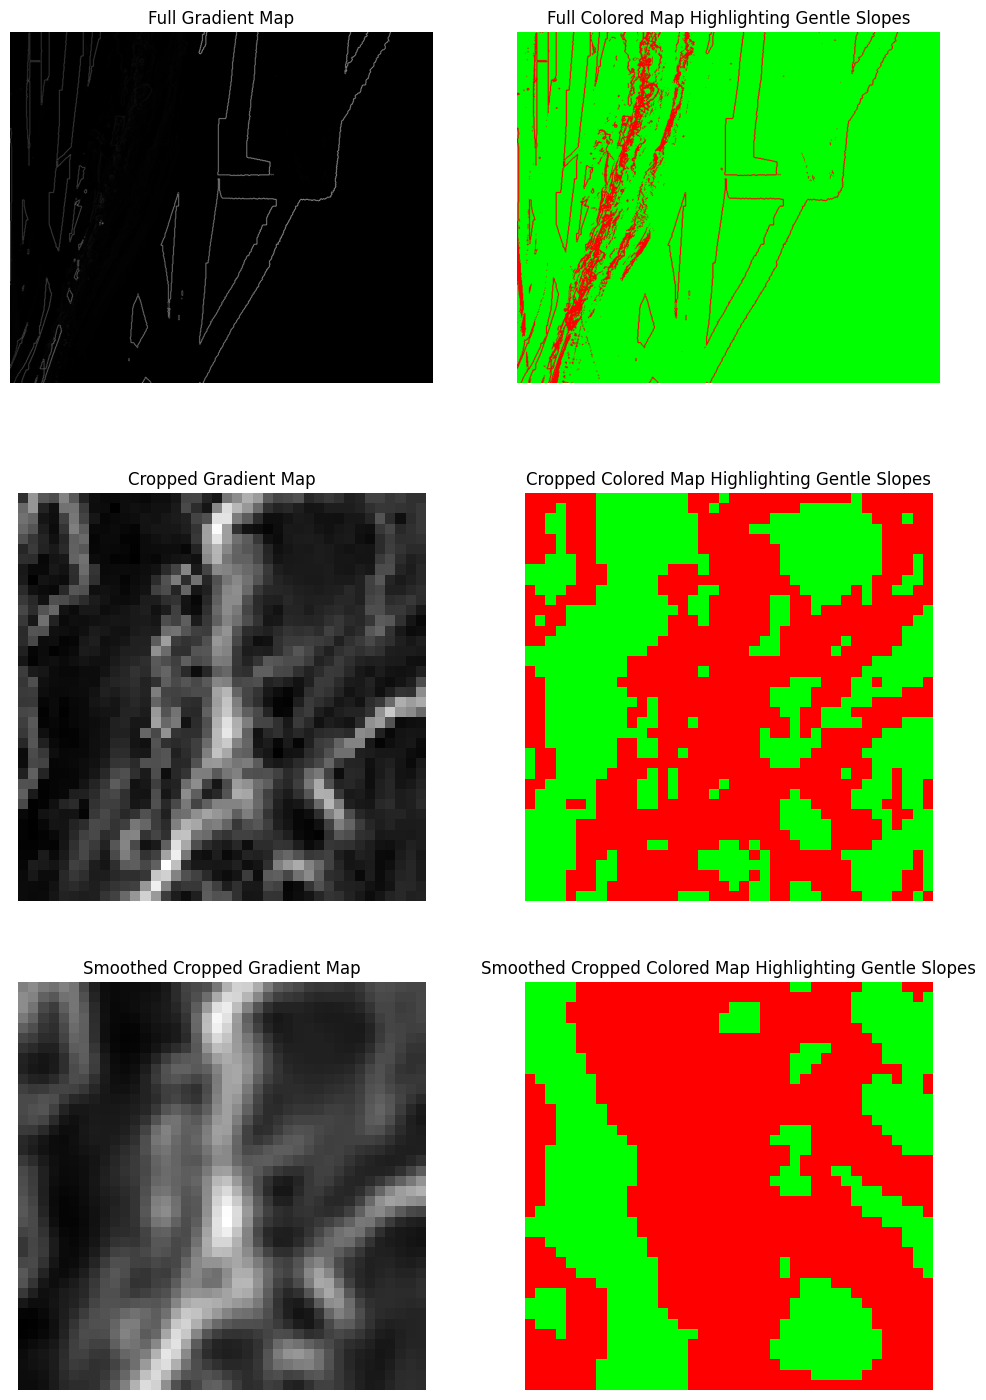

In [108]:
from scipy.ndimage import gaussian_filter

# Convert the image to a NumPy array
elevation_array = np.array(image)

# Compute the gradient of the elevation map
gradient_y, gradient_x = np.gradient(elevation_array)

# Compute the magnitude of the gradient
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

# Normalize the gradient to the range [0, 1]
min_val = np.min(gradient_magnitude)
max_val = np.max(gradient_magnitude)
gradient_normalized = (gradient_magnitude - min_val) / (max_val - min_val)

# Create a colored map to highlight gentle slopes
gentle_slope_map = np.zeros((elevation_array.shape[0], elevation_array.shape[1], 3))

threshold = 0.009
# Set green where gradient is low (gentle slopes)
gentle_slope_map[gradient_normalized < threshold] = [0, 1, 0]  # Adjust the threshold as needed

# Set red where gradient is high (steep slopes)
gentle_slope_map[gradient_normalized >= threshold] = [1, 0, 0]

# Define coordinates for the zoomed-in portion
x_start, x_end = 200, 240  # Example values, replace with your coordinates
y_start, y_end = 100, 140  # Example values, replace with your coordinates

# x_start, x_end = 200, 240  # Example values, replace with your coordinates
# y_start, y_end = 140, 180  # Example values, replace with your coordinates

# Crop the images
cropped_elevation_array = elevation_array[y_start:y_end, x_start:x_end]
cropped_gradient_normalized = gradient_normalized[y_start:y_end, x_start:x_end]
cropped_gentle_slope_map = gentle_slope_map[y_start:y_end, x_start:x_end]

# Apply Gaussian smoothing to the cropped gradient normalized image
smoothed_cropped_gradient = gaussian_filter(cropped_gradient_normalized, sigma=1)


# Plot the full and cropped gradient maps and colored maps
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

# Full gradient map
axes[0, 0].imshow(gradient_normalized, cmap='gray')
axes[0, 0].set_title('Full Gradient Map')
axes[0, 0].axis('off')

# Full colored map
axes[0, 1].imshow(gentle_slope_map)
axes[0, 1].set_title('Full Colored Map Highlighting Gentle Slopes')
axes[0, 1].axis('off')

# Cropped gradient map
axes[1, 0].imshow(cropped_gradient_normalized, cmap='gray')
axes[1, 0].set_title('Cropped Gradient Map')
axes[1, 0].axis('off')

# Cropped colored map
axes[1, 1].imshow(cropped_gentle_slope_map)
axes[1, 1].set_title('Cropped Colored Map Highlighting Gentle Slopes')
axes[1, 1].axis('off')

# Smoothed cropped gradient map
axes[2, 0].imshow(smoothed_cropped_gradient, cmap='gray')
axes[2, 0].set_title('Smoothed Cropped Gradient Map')
axes[2, 0].axis('off')

# Smoothed cropped colored map
smoothed_cropped_gentle_slope_map = np.zeros((smoothed_cropped_gradient.shape[0], smoothed_cropped_gradient.shape[1], 3))
smoothed_cropped_gentle_slope_map[smoothed_cropped_gradient <threshold] = [0, 1, 0]
smoothed_cropped_gentle_slope_map[smoothed_cropped_gradient >= threshold] = [1, 0, 0]

smoothed_cropped_gentle_slope_map_reflected = np.flip(smoothed_cropped_gentle_slope_map, axis=0)

axes[2, 1].imshow(smoothed_cropped_gentle_slope_map_reflected)
axes[2, 1].set_title('Smoothed Cropped Colored Map Highlighting Gentle Slopes')
axes[2, 1].axis('off')

plt.show()

In [99]:
smoothed_cropped_gentle_slope_map.shape

(40, 40, 3)

In [100]:
# Convert the smoothed cropped colored map to features and values arrays
height, width, _ = smoothed_cropped_gentle_slope_map.shape

# Create a meshgrid of normalized coordinates
x_coords = np.linspace(0, 1, width)
y_coords = np.linspace(0, 1, height)
xx, yy = np.meshgrid(x_coords, y_coords)

# Flatten the coordinates
features = np.vstack((xx.ravel(), yy.ravel())).T

# Extract the values (0 or 1) from the smoothed cropped colored map
values = np.zeros((height, width), dtype=int)
values[smoothed_cropped_gradient >= threshold] = 1
values = values.ravel()

In [101]:
features.shape, values.shape

((1600, 2), (1600,))

In [102]:
np.unique(values)

array([0, 1])

In [103]:
perlin_dict = {
    "features": features,
    "values": values,
    'resolution': [40,40], 
    'coordinates': ['x0', 'x1'], 
    'octaves': 3,
    'dimension' :2 
}

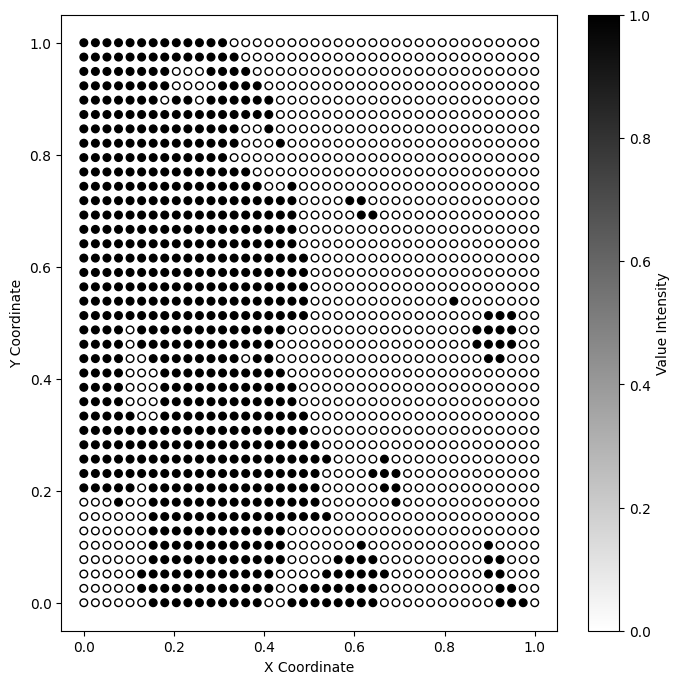

In [104]:
import ND_north_star.src.noise_generators.perlin_noise_generator as PNG

PNG.plot_perlin_2D_3D(perlin_dict, 'black')



In [105]:
import pickle

# Save the dictionary to a file
with open('perlin_dict_2.pkl', 'wb') as f:
    pickle.dump(perlin_dict, f)